In [2]:
import numpy as np
import matplotlib.pyplot as plt

Encoder-length[cm] conversion factors

In [3]:
trolley_to_radius = 22.7 / 30000.0
rotate_to_phi = np.pi / 8000.0
vertical_to_z = 15.2 / 50000.0

Define column numbers

In [4]:
idx_trolley = 0
idx_rotate = 1
idx_vertical = 2
idx_bfx = 3
idx_bfx_std = 4
idx_bfy = 5
idx_bfy_std = 6
idx_bfz = 7
idx_bfz_std = 8
idx_b0_status = 9
idx_monitor = 10
idx_monitor_std = 11
idx_time = 12

Load the raw data

In [5]:
# Modify only here
data_name = '04-10-2022_20-25'


data_path = 'data/' + data_name
data = np.loadtxt(data_path + '/output.txt')

Split the B0 on and off data and create a difference data

In [6]:
data_on = data[::2]
data_off = data[1::2]

data_diff = data_on
data_diff[:, idx_bfx] = data_on[:, idx_bfx] - data_off[:, idx_bfx]
data_diff[:, idx_bfy] = data_on[:, idx_bfy] - data_off[:, idx_bfy]
data_diff[:, idx_bfz] = data_on[:, idx_bfz] - data_off[:, idx_bfz]
data_diff[:, idx_monitor] = data_on[:, idx_monitor] - data_off[:, idx_monitor]

Take a look at time vs monitor data

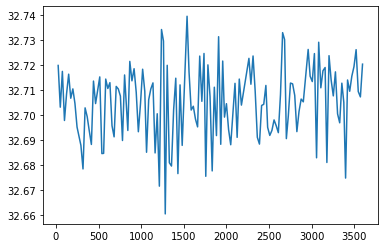

In [7]:
plt.plot(data_diff[:, idx_time], data_diff[:, idx_monitor])

Print trolley rotate and vertical to identify where to split data

In [23]:
print(data_diff[:, 0:3])

[[  4525.   4160. -70000.]
 [  4525.   4160. -66500.]
 [  4525.   4160. -63000.]
 [  4525.   4160. -59500.]
 [  4525.   4160. -56000.]
 [  4525.   4160. -52500.]
 [  4525.   4160. -49000.]
 [  4525.   4160. -45500.]
 [  4525.   4160. -42000.]
 [  4525.   4160. -38500.]
 [  4525.   4160. -35000.]
 [  4525.   4160. -35000.]
 [  4525.   4160. -38500.]
 [  4525.   4160. -42000.]
 [  4525.   4160. -45500.]
 [  4525.   4160. -49000.]
 [  4525.   4160. -52500.]
 [  4525.   4160. -56000.]
 [  4525.   4160. -59500.]
 [  4525.   4160. -63000.]
 [  4525.   4160. -66500.]
 [  4525.   4160. -70000.]
 [  4525.   4160. -70000.]
 [  4525.   4160. -66500.]
 [  4525.   4160. -63000.]
 [  4525.   4160. -59500.]
 [  4525.   4160. -56000.]
 [  4525.   4160. -52500.]
 [  4525.   4160. -49000.]
 [  4525.   4160. -45500.]
 [  4525.   4160. -42000.]
 [  4525.   4160. -38500.]
 [  4525.   4160. -35000.]
 [  2525.   4160. -52032.]
 [  4525.   4160. -52032.]
 [  8525.   4160. -52032.]
 [ 12525.   4160. -52032.]
 

In [22]:
data_z_scan = data_diff[:33]

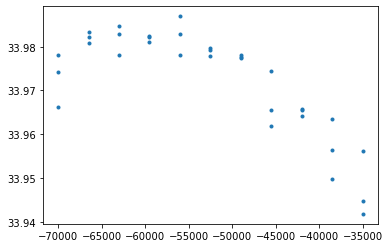

In [26]:
plt.plot(data_z_scan[:, idx_vertical], data_z_scan[:, idx_bfz], '.')

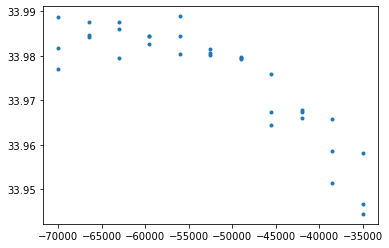

In [27]:
plt.plot(data_z_scan[:, idx_vertical], np.sqrt(data_z_scan[:, idx_bfx]**2 + data_z_scan[:, idx_bfy]**2 + data_z_scan[:, idx_bfz]**2), '.')